In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("training_dataset.csv")

In [18]:
categorical_columns = [
    'pekerjaan', 'status_perkawinan', 'pendidikan', 'gagal_bayar_sebelumnya',
    'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'bulan_kontak_terakhir',
    'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya'
]

In [19]:
df_clean = df[~df[categorical_columns].isin(['unknown']).any(axis=1)].reset_index(drop=True)


In [20]:
y = df_clean["berlangganan_deposito"]
X = df_clean.drop(columns=["berlangganan_deposito", "customer_number"])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [22]:
numerical_features = [
    'usia', 'jumlah_kontak_kampanye_ini', 'hari_sejak_kontak_sebelumnya',
    'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan',
    'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen',
    'suku_bunga_euribor_3bln', 'jumlah_pekerja'
]

In [23]:
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num = num_imputer.transform(X_test[numerical_features])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [24]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_columns])
X_test_cat = encoder.transform(X_test[categorical_columns])

In [25]:
X_train_final = np.hstack([X_train_num_scaled, X_train_cat])
X_test_final = np.hstack([X_test_num_scaled, X_test_cat])

In [26]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)

In [27]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

In [28]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', lr)],
    voting='soft'
)

In [29]:
voting_clf.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=200,
                                                         random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [30]:
y_pred = voting_clf.predict(X_test_final)
y_pred_proba = voting_clf.predict_proba(X_test_final)[:, 1]

In [31]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2958
           1       0.49      0.53      0.51       432

    accuracy                           0.87      3390
   macro avg       0.71      0.72      0.72      3390
weighted avg       0.87      0.87      0.87      3390



In [32]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.7998


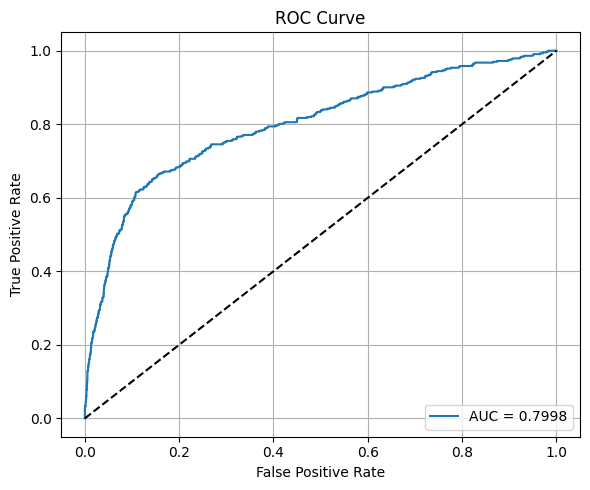

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")
print("Halo Shanna!")

Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
Halo Shanna!
